In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
import sys
sys.path.append('benchmark/')
from gammli_test import gammli
from xgb_test import xgb
from svd_test import svd
from deepfm_fm_test import deepfm_fm
from rank_test import rtest
sys.path.append('../')
from gammli.GAMMLI import GAMMLI
from gammli.DataReader import data_initialize
from gammli.utils import local_visualize
from gammli.utils import global_visualize_density
from gammli.utils import feature_importance_visualize
from gammli.utils import plot_trajectory
from gammli.utils import plot_regularization
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
random_state=0
data = pd.read_csv('data/movielens/Movielens.csv')

task_type = "Regression"

list1 = data.columns
meta_info = OrderedDict()
for i in list1:
    meta_info[i]={'type': 'categorical','source':'item'} 
meta_info['Occupation']={"type":"categorical",'source':'user'}
meta_info['Gender']={"type":"categorical",'source':'user'}
meta_info['Age'] = {"type":"continues",'source':'user'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
#the best shrinkage is 1
#the best combination is 0.6
lx_params = {
        "rank" : 5,
        "main_effect_epochs":200,
        "interaction_epochs" : 30 ,
        "tuning_epochs" : 40 , 
        "mf_training_iters": 400,
        "u_group_num":50,
        "i_group_num":50,
        "best_shrinkage":0.84,
        "best_combination":0.768,
        "auto_tune":True,
        "verbose":False
    }

deepfm_fm_params = {
        "epochs":50,
        "loss_type" : 'mse' ,
        "eval_metric" : mean_squared_error , 
        "greater_is_better": False,
        "verbose":True,
        "early_stopping": True
    }

W0804 16:53:12.767664 28040 deprecation.py:323] From C:\Users\64161\Anaconda3\lib\site-packages\tensorflow_core\python\compat\v2_compat.py:65: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
result_gammli = gammli('warm',data, meta_info,task_type , random_state=0, params=lx_params)
result_svd = svd('warm',data, meta_info, task_type , random_state=0)
result_deepfm, result_fm = deepfm_fm('warm',data, meta_info,task_type , random_state=0, params=deepfm_fm_params)
result_xgb = xgb('warm',data, meta_info, task_type , random_state=0)

result_sim_std = pd.concat([result_gammli,result_svd,result_xgb,result_deepfm,result_fm],0)

result_ml.to_csv('movielens_result.csv',index=None)

..\lvxnn\DataReader.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int8)
..\lvxnn\DataReader.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int16)


Memory usage of dataframe is 152.62 MB
Memory usage after optimization is: 25.95 MB
Decreased by 83.0%
Memory usage of dataframe is 38.15 MB
Memory usage after optimization is: 6.49 MB
Decreased by 83.0%
test cold start user: 0
test cold start item: 34
validation cold start user: 0
validation cold start item: 16


..\lvxnn\DataReader.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int8)
..\lvxnn\DataReader.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001EC0D1C8268>, 'loss_type': 'mse', 'epoch': 50, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_squared_error at 0x000001EC7F999B70>, 'random_seed': 0, 'feature_size': 9787, 'field_size': 23}


W0723 20:42:08.182502 22120 deprecation.py:506] From benchmark/deepfm\DeepFM.py:93: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#params: 63551
[1] train-result=0.8800, valid-result=0.9039 [13.6 s]
[2] train-result=0.8372, valid-result=0.8653 [13.7 s]
[3] train-result=0.8231, valid-result=0.8537 [13.6 s]
[4] train-result=0.8141, valid-result=0.8448 [13.6 s]
[5] train-result=0.8074, valid-result=0.8399 [13.6 s]
[6] train-result=0.8029, valid-result=0.8349 [13.5 s]
[7] train-result=0.7963, valid-result=0.8317 [13.6 s]
[8] train-result=0.7818, valid-result=0.8208 [13.8 s]
[9] train-result=0.7657, valid-result=0.8101 [13.7 s]
[10] train-result=0.7571, valid-result=0.8084 [14.7 s]
[11] train-result=0.7344, valid-result=0.7950 [16.9 s]
[12] train-result=0.7231, valid-result=0.7912 [17.1 s]
[13] train-result=0.7094, valid-result=0.7842 [15.6 s]
[14] train-result=0.7038, valid-result=0.7850 [17.0 s]
[15] train-result=0.6984, valid-result=0.7856 [16.8 s]
[16] train-result=0.6878, valid-result=0.7775 [14.6 s]
[17] train-result=0.6845, valid-result=0.7789 [16.9 s]
[18] train-result=0.6796, valid-result=0.7774 [15.8 s]
[19]

..\lvxnn\DataReader.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int8)
..\lvxnn\DataReader.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int16)


{'embedding_size': 5, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x000001EC0D1C8268>, 'loss_type': 'mse', 'epoch': 50, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_squared_error at 0x000001EC7F999B70>, 'random_seed': 0, 'feature_size': 9787, 'field_size': 23}
#params: 63519
[1] train-result=1.0615, valid-result=1.0930 [12.6 s]
[2] train-result=0.9113, valid-result=0.9442 [10.4 s]
[3] train-result=0.8667, valid-result=0.8990 [11.2 s]
[4] train-result=0.8457, valid-result=0.8778 [12.8 s]
[5] train-result=0.8335, valid-result=0.8655 [10.1 s]
[6] train-result=0.8280, valid-result=0.8610 [11.4 s]
[7] train-result=0.8243, valid-result=0.8566 [12.8 s]
[8] train-result=0.8156, valid-result=0.8488 [11.0 s]
[9] train-result=0.8092, valid-result=0.8428 [13.2 s]
[10] train-result=0

[41] train-result=0.6475, valid-result=0.7784 [11.2 s]
[42] train-result=0.6461, valid-result=0.7784 [12.6 s]
[43] train-result=0.6452, valid-result=0.7795 [11.6 s]
[44] train-result=0.6417, valid-result=0.7783 [12.0 s]
[45] train-result=0.6447, valid-result=0.7841 [10.4 s]
[46] train-result=0.6419, valid-result=0.7816 [12.2 s]
[47] train-result=0.6385, valid-result=0.7803 [12.8 s]
[48] train-result=0.6417, valid-result=0.7863 [12.8 s]
[49] train-result=0.6384, valid-result=0.7819 [14.7 s]
[50] train-result=0.6404, valid-result=0.7862 [11.4 s]


## explanation

In [2]:
train , test = train_test_split(data,test_size=0.2 ,random_state=0)
task_type = "Regression"
list1 = data.columns
meta_info = OrderedDict()
for i in list1:
    meta_info[i]={'type': 'categorical','source':'item'} 
meta_info['Occupation']={"type":"categorical",'source':'user'}
meta_info['Gender']={"type":"categorical",'source':'user'}
meta_info['Age'] = {"type":"continues",'source':'user'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info,sy, sy_t = data_initialize(train,test,meta_info,task_type ,'warm', random_state, True)
model = GAMMLI(model_info=model_info, meta_info=meta_info, subnet_arch=[8, 16],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=1000, lr_bp=0.001, auto_tune=False,
               interaction_epochs=20,main_effect_epochs=100,tuning_epochs=50,loss_threshold_main=0.001,loss_threshold_inter=0.01,combine_range=0.9,
              verbose=True, early_stop_thres=50,interact_num=10,u_group_num=50,i_group_num=30,scale_ratio=0.8,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=400,change_mode=True,convergence_threshold=0.001,max_rank=3,shrinkage_value=20, wc='warm',interaction_restrict='intra')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

..\gammli\DataReader.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int8)
..\gammli\DataReader.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.int16)


Memory usage of dataframe is 152.62 MB
Memory usage after optimization is: 25.95 MB
Decreased by 83.0%
Memory usage of dataframe is 38.15 MB
Memory usage after optimization is: 6.49 MB
Decreased by 83.0%
test cold start user: 0
test cold start item: 34
validation cold start user: 0
validation cold start item: 16
ListWrapper(['Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.43314, val loss: 0.43351
Main effects training epoch: 2, train loss: 0.43159, val loss: 0.43207
Main effects training epoch: 3, train loss: 0.43146, val loss: 0.43195
Main effects training epoch: 4, train loss: 0.43137, val loss: 0.43186
Main effects training epoch: 5, tra

Main effects tuning epoch: 5, train loss: 0.43108, val loss: 0.43131
Main effects tuning epoch: 6, train loss: 0.43114, val loss: 0.43137
Main effects tuning epoch: 7, train loss: 0.43108, val loss: 0.43131
Main effects tuning epoch: 8, train loss: 0.43101, val loss: 0.43123
Main effects tuning epoch: 9, train loss: 0.43105, val loss: 0.43127
Main effects tuning epoch: 10, train loss: 0.43115, val loss: 0.43136
Main effects tuning epoch: 11, train loss: 0.43121, val loss: 0.43142
Main effects tuning epoch: 12, train loss: 0.43088, val loss: 0.43110
Main effects tuning epoch: 13, train loss: 0.43112, val loss: 0.43133
Main effects tuning epoch: 14, train loss: 0.43100, val loss: 0.43120
Main effects tuning epoch: 15, train loss: 0.43088, val loss: 0.43108
Main effects tuning epoch: 16, train loss: 0.43113, val loss: 0.43133
Main effects tuning epoch: 17, train loss: 0.43109, val loss: 0.43128
Main effects tuning epoch: 18, train loss: 0.43122, val loss: 0.43141
Main effects tuning epoch

C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 1: observed MAE=0.410213 validation MAE=0.412226,rank=3


C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 2: observed MAE=0.407176 validation MAE=0.409345,rank=3


C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 3: observed MAE=0.405467 validation MAE=0.407724,rank=3
[SoftImpute] Iter 4: observed MAE=0.404209 validation MAE=0.406552,rank=3
[SoftImpute] Iter 5: observed MAE=0.403163 validation MAE=0.405575,rank=3
[SoftImpute] Iter 6: observed MAE=0.402453 validation MAE=0.404915,rank=3
[SoftImpute] Iter 7: observed MAE=0.401659 validation MAE=0.404146,rank=3
[SoftImpute] Iter 8: observed MAE=0.401133 validation MAE=0.403659,rank=3
[SoftImpute] Iter 9: observed MAE=0.400598 validation MAE=0.403161,rank=3
[SoftImpute] Iter 10: observed MAE=0.400130 validation MAE=0.402717,rank=3
[SoftImpute] Iter 11: observed MAE=0.399833 validation MAE=0.402462,rank=3
[SoftImpute] Iter 12: observed MAE=0.399540 validation MAE=0.402155,rank=3
[SoftImpute] Iter 13: observed MAE=0.399340 validation MAE=0.401990,rank=3
[SoftImpute] Iter 14: observed MAE=0.399062 validation MAE=0.401707,rank=3
[SoftImpute] Iter 15: observed MAE=0.398834 validation MAE=0.401509,rank=3
[SoftImpute] Iter 16: observed M

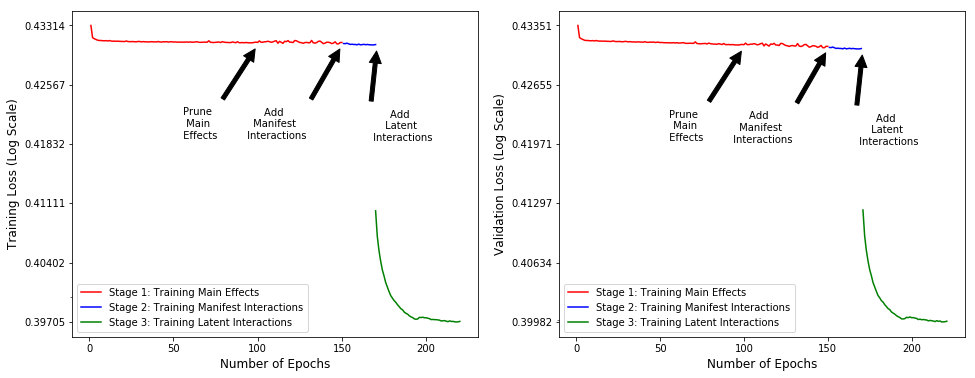

In [5]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False, save_eps=False)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False, save_eps=False)

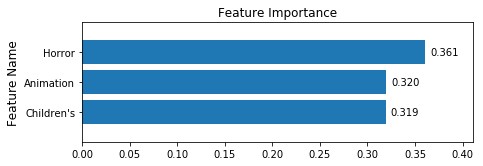

In [4]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False)
feature_importance_visualize(data_dict, save_png=False, folder=simu_dir, name='s1_feature')

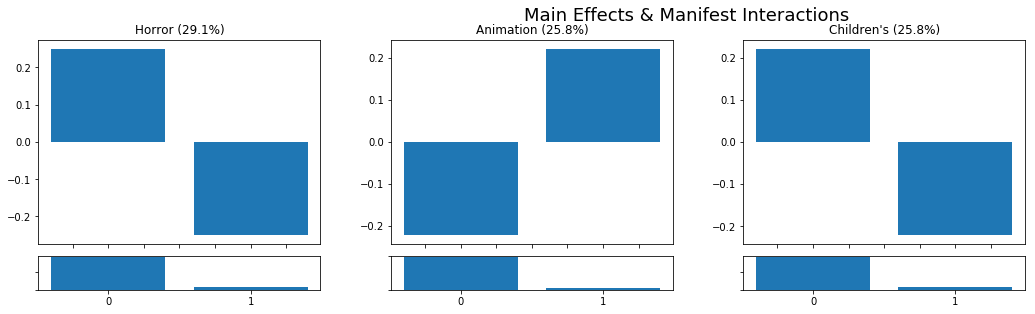

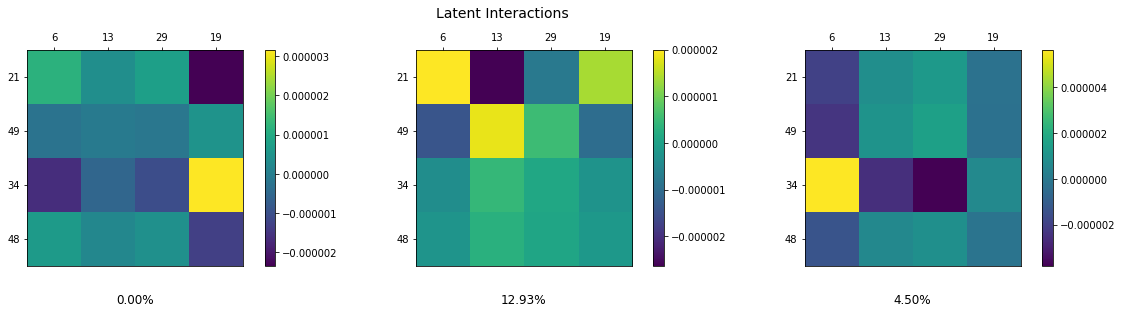

In [7]:
importance = model.get_all_rank(tr_Xi)
model.dash_board(data_dict, importance,simu_dir,False)

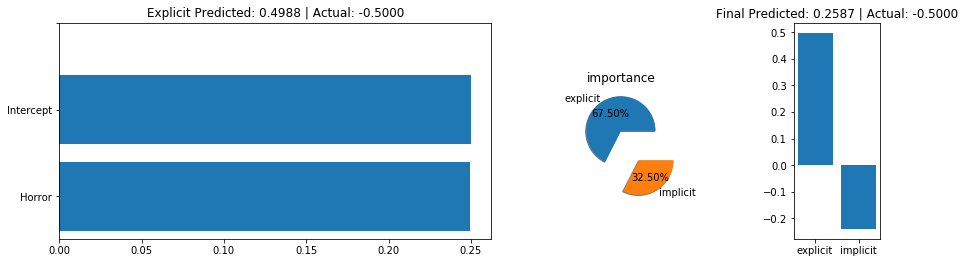

In [8]:
data_dict_local = model.local_explain(0,2,tr_x,tr_Xi,tr_y,'Regression')
local_visualize(data_dict_local, save_png=False, folder=simu_dir, name='s1_local')

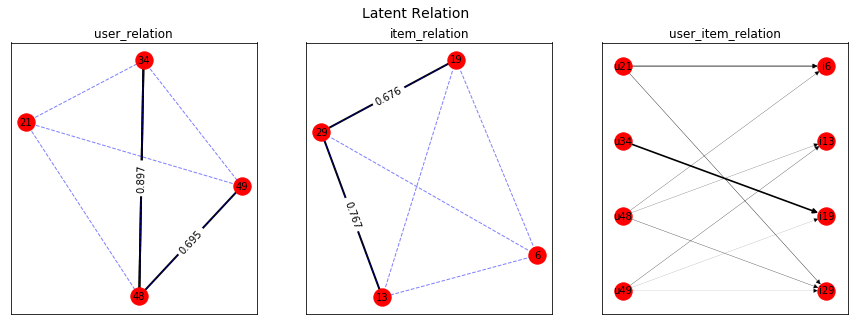

In [11]:
model.relation_plot(0.6,1500,False)

In [12]:
new = te_x[0,:].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group 48
 mean is [-0.00023061 -0.00012899  0.00036452]
 and std is [0.00887413 0.0119328  0.01228855]
 the confidence interval is [[-0.0176239  -0.02351727 -0.02372104],[0.01716268 0.0232593  0.02445007]]
